<a href="https://colab.research.google.com/github/Kanishk-blip/-git_test-/blob/main/Solar_Bird_Drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload archive (1).zip

import zipfile
import os

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("solar_dataset")

print("✅ Dataset extracted.")


Saving archive (1).zip to archive (1).zip
✅ Dataset extracted.


In [2]:
import shutil
import glob

src_bird = "solar_dataset/Faulty_solar_panel/Bird-drop"
src_clean = "solar_dataset/Faulty_solar_panel/Clean"
target_dir = "processed_dataset_binary"

os.makedirs(f"{target_dir}/Bird_Dropping", exist_ok=True)
os.makedirs(f"{target_dir}/Clean_Panel", exist_ok=True)

for path in glob.glob(f"{src_bird}/**/*", recursive=True):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Bird_Dropping")

for path in glob.glob(f"{src_clean}/*"):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Clean_Panel")

print("✅ Data copied into training folders.")


✅ Data copied into training folders.


In [3]:
import shutil
import glob

src_bird = "solar_dataset/Faulty_solar_panel/Bird-drop"
src_clean = "solar_dataset/Faulty_solar_panel/Clean"
target_dir = "processed_dataset_binary"

os.makedirs(f"{target_dir}/Bird_Dropping", exist_ok=True)
os.makedirs(f"{target_dir}/Clean_Panel", exist_ok=True)

for path in glob.glob(f"{src_bird}/**/*", recursive=True):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Bird_Dropping")

for path in glob.glob(f"{src_clean}/*"):
    if path.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(path, f"{target_dir}/Clean_Panel")

print("✅ Data copied into training folders.")


✅ Data copied into training folders.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "processed_dataset_binary",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "processed_dataset_binary",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

base_model = MobileNetV2(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, validation_data=val_data, epochs=10)

model.save("bird_drop_detector.h5")
print("✅ Model trained and saved.")


Found 321 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6040 - loss: 0.7290 - val_accuracy: 0.8608 - val_loss: 0.2978
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 628ms/step - accuracy: 0.8662 - loss: 0.3200 - val_accuracy: 0.9367 - val_loss: 0.2103
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 614ms/step - accuracy: 0.9231 - loss: 0.2144 - val_accuracy: 0.9114 - val_loss: 0.2384
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 696ms/step - accuracy: 0.9225 - loss: 0.1814 - val_accuracy: 0.9241 - val_loss: 0.2335
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 743ms/step - accuracy: 0.9496 - loss: 0.1446 - val_accuracy: 0.8861 - val_loss: 0.2266
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 607ms/step - accuracy: 0.9407 - loss: 0.1378 - val_accuracy: 0.9494 - val_loss: 0.1760
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 680ms/step - accuracy: 0.9712 - loss: 0.0886 - val_accuracy: 0.9494 - val_loss: 0.1795
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 609ms/step - accuracy: 0.9767 - loss: 0.0795 - val_accuracy: 0.9

✅ Model trained and saved.


In [7]:
import os
import glob
import shutil

# Source folders
original_data_bird = "processed_dataset_binary/Bird_Dropping"
original_data_clean = "processed_dataset_binary/Clean_Panel"

kaggle_data_bird = "/root/.cache/kagglehub/datasets/rppost/solar-panel/versions/1/Training/bird drop"
kaggle_data_clean = "/root/.cache/kagglehub/datasets/rppost/solar-panel/versions/1/Training/clean"

# Target folder
fine_tune_dir = "fine_tune_dataset"
os.makedirs(f"{fine_tune_dir}/Bird_Dropping", exist_ok=True)
os.makedirs(f"{fine_tune_dir}/Clean_Panel", exist_ok=True)

# Copy original data
for file in glob.glob(f"{original_data_bird}/*"):
    shutil.copy(file, f"{fine_tune_dir}/Bird_Dropping")

for file in glob.glob(f"{original_data_clean}/*"):
    shutil.copy(file, f"{fine_tune_dir}/Clean_Panel")

# Copy 200 images from Kaggle
for file in glob.glob(f"{kaggle_data_bird}/*")[:200]:
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(file, f"{fine_tune_dir}/Bird_Dropping")

for file in glob.glob(f"{kaggle_data_clean}/*")[:200]:
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.copy(file, f"{fine_tune_dir}/Clean_Panel")

# Confirm
print("✅ Fine-tune dataset ready.")
print("Bird Dropping:", len(os.listdir(f'{fine_tune_dir}/Bird_Dropping')))
print("Clean Panel:", len(os.listdir(f'{fine_tune_dir}/Clean_Panel')))


✅ Fine-tune dataset ready.
Bird Dropping: 207
Clean Panel: 193


Found 321 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7626 - loss: 0.7287 - val_accuracy: 0.5696 - val_loss: 8.3770
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9271 - loss: 0.1700 - val_accuracy: 0.7595 - val_loss: 4.0348
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 990ms/step - accuracy: 0.9793 - loss: 0.0729 - val_accuracy: 0.7848 - val_loss: 3.8578
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 986ms/step - accuracy: 0.9831 - loss: 0.0492 - val_accuracy: 0.8481 - val_loss: 2.9517
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9803 - loss: 0.0570 - val_accuracy: 0.7975 - val_loss: 4.4728


✅ Fine-tuned model saved as bird_drop_finetuned.h5


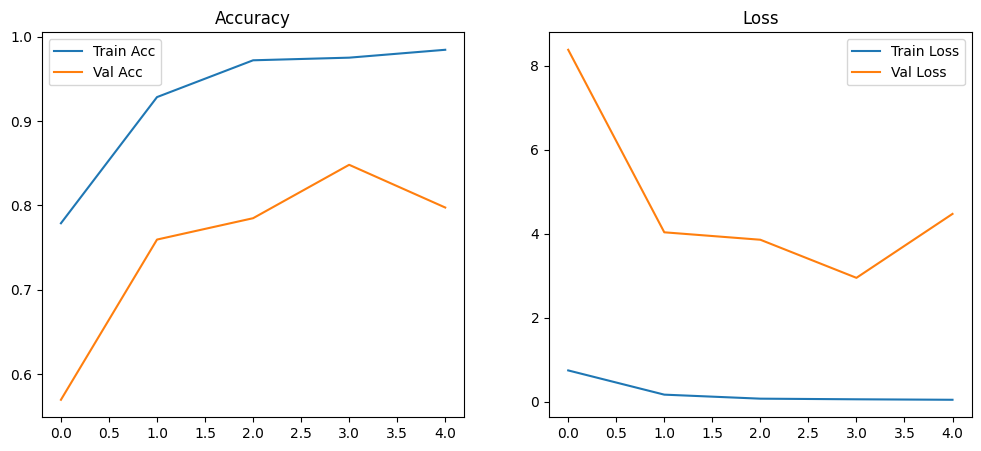

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# STEP 1: Load the pretrained model
model = load_model("bird_drop_detector.h5")

# STEP 2: Unfreeze last 30 layers of MobileNetV2
base_model = model.layers[0]
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# STEP 3: Recompile with new trainable layers
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 4: Set up fine-tuning data generators
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "fine_tune_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "fine_tune_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# STEP 5: Fine-tune the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# STEP 6: Save the fine-tuned model
model.save("bird_drop_finetuned.h5")
print("✅ Fine-tuned model saved as bird_drop_finetuned.h5")

# STEP 7: Plot training and validation metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()
